In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
import os
import pandas as pd
import cv2
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [12]:
# Load the HAM10000 dataset
path = '/content/drive/MyDrive/Sp23/BME548L_Machine_Learning_and_Imaging/548L_MLI_Project/Skin_Lesion_Classification/HAM10000data/'
df = pd.read_csv(path + 'train_metadata.csv')

In [13]:
# Create a list to store the augmented images and corresponding labels
augmented_data = []

# Loop through each category and select 100 images to augment
categories = df['dx'].unique()
for category in categories:
    images = df[df['dx'] == category].sample(n=100)
    print(f"Category: {category}")
    print(f"Number of images before augmentation: {len(images)}")
    for index, image in tqdm(images.iterrows(), total=len(images), desc="Augmenting"):
        # Load the image and resize to (150, 200)
        if os.path.exists(image['image_path']):
            img = cv2.imread(image['image_path'])
            img = cv2.resize(img, (200, 150))  # resize to (150, 200)
            # Apply a vertical and horizontal flip
            # also a horizontal flip following the vertical flip (180 degree rotation)
            img_vertical = cv2.flip(img, 0) # vertical flip
            img_horizontal = cv2.flip(img, 1) # horizontal flip
            img_v_h = cv2.flip(img_vertical, 1) # horizontal flip followinng the vertical flip
            # Add the augmented images with corresponding labels to the list
            augmented_data.append((img, image['dx'])) # original image
            augmented_data.append((img_vertical, image['dx']))  # vertically flipped image
            augmented_data.append((img_horizontal, image['dx']))  # horizontally flipped image
            augmented_data.append((img_v_h, image['dx'])) # 180-degree-rotated image
        else:
            print(f"Invalid image file: {image['image_id']}")
    print(f"\nNumber of images after augmentation: {len(augmented_data)}\n")

Category: bkl
Number of images before augmentation: 100


Augmenting: 100%|██████████| 100/100 [00:31<00:00,  3.21it/s]



Number of images after augmentation: 400

Category: nv
Number of images before augmentation: 100


Augmenting: 100%|██████████| 100/100 [00:30<00:00,  3.29it/s]



Number of images after augmentation: 800

Category: df
Number of images before augmentation: 100


Augmenting: 100%|██████████| 100/100 [00:05<00:00, 17.40it/s]



Number of images after augmentation: 1200

Category: mel
Number of images before augmentation: 100


Augmenting: 100%|██████████| 100/100 [00:29<00:00,  3.43it/s]



Number of images after augmentation: 1600

Category: vasc
Number of images before augmentation: 100


Augmenting: 100%|██████████| 100/100 [00:11<00:00,  8.56it/s]



Number of images after augmentation: 2000

Category: bcc
Number of images before augmentation: 100


Augmenting: 100%|██████████| 100/100 [00:22<00:00,  4.50it/s]



Number of images after augmentation: 2400

Category: akiec
Number of images before augmentation: 100


Augmenting: 100%|██████████| 100/100 [00:25<00:00,  3.90it/s]


Number of images after augmentation: 2800



In [14]:
# Save the augmented data as a single pickle file
with open('augmented_datas.pickle', 'wb') as f:
    pickle.dump(augmented_data, f)

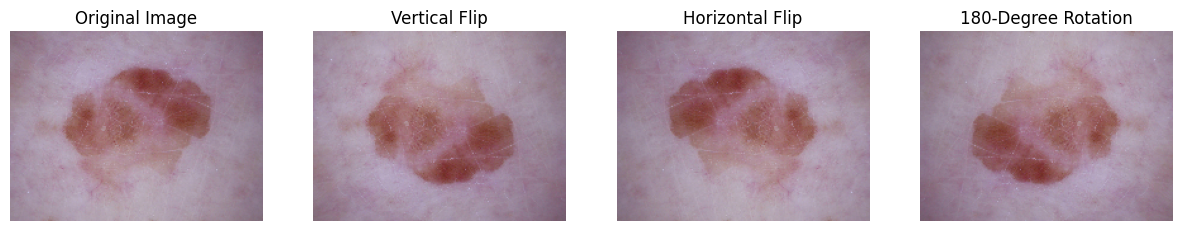

In [25]:
# Plot images before and after augmentation from one original image
img = augmented_data[0][0]  # First image is the original one
img_vertical = augmented_data[1][0]  # Second image is the vertically flipped one
img_horizontal = augmented_data[2][0]  # Third image is the horizontally flipped one
img_180 = augmented_data[3][0]  # Fourth image is the 180 degree rotated one

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(img_vertical, cv2.COLOR_BGR2RGB))
ax[1].set_title("Vertical Flip")
ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(img_horizontal, cv2.COLOR_BGR2RGB))
ax[2].set_title("Horizontal Flip")
ax[2].axis('off')
ax[3].imshow(cv2.cvtColor(img_180, cv2.COLOR_BGR2RGB))
ax[3].set_title("180-Degree Rotation")
ax[3].axis('off')
plt.show()

In [26]:
path = '/content/drive/MyDrive/Sp23/BME548L_Machine_Learning_and_Imaging/548L_MLI_Project/Skin_Lesion_Classification/HAM10000data/'

# Shuffle the augmented data
random.shuffle(augmented_data)

# Split the data into training and test sets in a 80:20 ratio
split_idx = int(len(augmented_data) * 0.8)
train_data = augmented_data[:split_idx]
test_data = augmented_data[split_idx:]

# Save the augmented data as a pickle file
with open('augmented_data.pickle', 'wb') as f:
    pickle.dump(augmented_data, f)

# Save the training and test sets as separate pickle files
with open(path + 'train_data.pickle', 'wb') as f:
    pickle.dump(train_data, f)
with open(path + 'test_data.pickle', 'wb') as f:
    pickle.dump(test_data, f)